# 단순 선형회귀

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 아버지와 아들의 키 - Galton

In [20]:
df = pd.read_csv('http://www.randomservices.org/random/data/Galton.txt', sep='\t')
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


- 아버지와 아들의 키만 발췌
- 컬럼명을 Father, Son으로 변경
- 단위 변경: inch --> cm

In [21]:
# Filtering
df = df[df.Gender == 'M']
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
4,2,75.5,66.5,M,73.5,4
5,2,75.5,66.5,M,72.5,4
8,3,75.0,64.0,M,71.0,2
10,4,75.0,64.0,M,70.5,5


In [22]:
# Selection
df = df[['Father','Height']]
df.head(3)

,Father,Height
0,78.5,73.2
4,75.5,73.5
5,75.5,72.5


In [23]:
# 컬럼명 변경
df.rename(columns={'Height':'Son'}, inplace=True)
df.head(3)

,Father,Son
0,78.5,73.2
4,75.5,73.5
5,75.5,72.5


In [24]:
# 단위 환산
df = df * 2.54
df.head(3)

,Father,Son
0,199.39,185.928
4,191.77,186.690
5,191.77,184.150


- 산점도(Scatter plot)

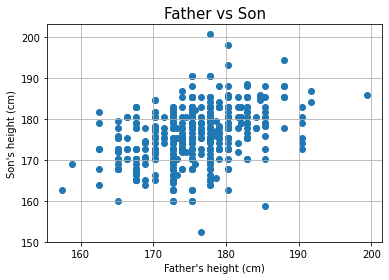

In [25]:
plt.scatter(df.Father, df.Son)      # 독립변수(x): 아버지의 키, 종속변수(y): 아들의 키
plt.grid()
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.title('Father vs Son', fontsize=15)
plt.show()

- 회귀선 구하기
    - 최소 자승법(np.linalg.lstsq())
    - 다항 회귀(np.polyfit())

In [26]:
weight, bias = np.polyfit(df.Father, df.Son, 1)     # x, y, 차수(dimension)
weight, bias

(0.447747917603028, 97.17763700739309)

In [27]:
xs = np.array([156, 201])
ys = xs * weight + bias
ys

array([167.02631215, 187.17496845])

In [28]:
# 2차식으로 회귀식을 구하려면
np.polyfit(df.Father, df.Son, 2)        # y = a*x**2 + b*x + c

array([6.10561389e-04, 2.32817725e-01, 1.16071746e+02])

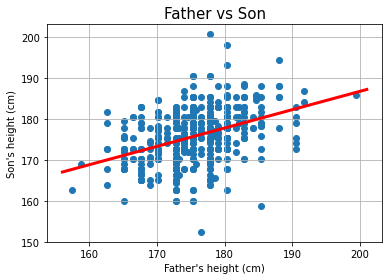

In [29]:
plt.scatter(df.Father, df.Son) 
plt.plot(xs, ys, 'r-', lw=3)     
plt.grid()
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.title('Father vs Son', fontsize=15)
plt.show()

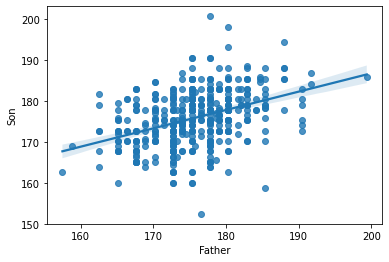

In [30]:
import seaborn as sns
sns.regplot(x='Father', y='Son', data=df)

- Scikit-Learn으로 구하기

In [31]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [32]:
df.shape

(465, 2)

In [33]:
# 학습
# lr.fit(df.Father, df.Son)         # 에러 발생, X 변수가 1개
lr.fit(df[['Father']], df.Son)      # lr.fit(df.Father.values.reshape(-1,1), df.Son)

LinearRegression()

In [34]:
# 가중치(coefficient, 계수) - weight
lr.coef_

array([0.44774792])

In [35]:
# 바이어스(intercept, 절편) - bias
lr.intercept_

97.17763700739341

In [36]:
# 잔차 제곱의 합(RSS: Residual Sum of Square)
lr._residues

17556.59951549399

In [38]:
# 평가 - R Squared
lr.score(df.Father.values.reshape(-1,1), df.Son.values)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


0.15312927478307048

In [39]:
from sklearn.metrics import r2_score
pred = lr.predict(df[['Father']])
r2_score(df.Son, pred)

0.15312927478307048